<a href="https://colab.research.google.com/github/obi1204/Python-Courses/blob/main/Obi_Health_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing file from computer to notebook

from google.colab import files
uploaded = files.upload()

In [ ]:
pip install apple-health

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

Element Tree (XML Tree): XML documents have a heierarchial structure that can be interpreted as a tree structure. Must contain a root element, all elements can contain sub elements, text and attributes

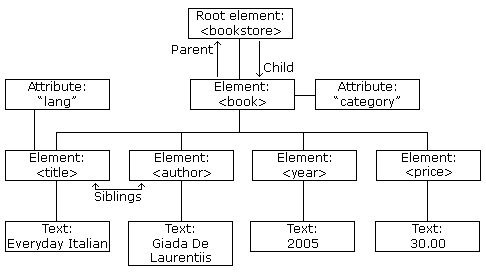

In [ ]:
#create element tree object
tree = ET.parse('data.xml')

#extracts the attributes of every health record into a dictionary (columns), the creates a list (rows)
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

#create dataframe from a list (rows) of dictionaries (columns)
data = pd.DataFrame(record_list)

#proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
  data[col] = pd.to_datetime(data[col])

#value is numeric, NaN if fails
data['value'] = pd.to_numeric(data['value'], errors='coerce')

#some records only count occurences
#filling with 1.0 (=one time) makes it easier to aggregate
data['value'] = data['value'].fillna(1.0)

#shorter observation name: use vectorized replace function
data['type'] = data['type'].str.replace('HKQuantityTypeIdentifier', '')
data['type'] = data['type'].str.replace('HKQCategoryTypeIdentifier', '')

In [ ]:
data

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,Height,Health,11.4,ft,2018-07-11 08:50:32-05:00,2018-07-11 08:50:32-05:00,2018-07-11 08:50:32-05:00,6.08333,NaN
1,BodyMass,Health,11.4,lb,2018-07-11 08:50:32-05:00,2018-07-11 08:50:32-05:00,2018-07-11 08:50:32-05:00,150.00000,NaN
2,BodyMass,Health,14.1,lb,2020-11-01 00:59:48-05:00,2020-11-01 00:59:48-05:00,2020-11-01 00:59:48-05:00,145.00000,NaN
3,BodyMass,18322’s iPhone,16.3.1,lb,2023-03-27 17:14:29-05:00,2023-03-27 17:14:29-05:00,2023-03-27 17:14:29-05:00,169.00000,NaN
4,StepCount,18322’s iPhone,14.2,count,2020-11-30 21:14:36-05:00,2020-11-30 21:03:34-05:00,2020-11-30 21:11:07-05:00,233.00000,"<<HKDevice: 0x2838679d0>, name:iPhone, manufac..."
...,...,...,...,...,...,...,...,...,...
318236,HKCategoryTypeIdentifierHeadphoneAudioExposure...,18322’s iPhone,16.4.1,NaN,2023-06-20 19:53:55-05:00,2023-06-20 18:41:23-05:00,2023-06-20 19:53:55-05:00,1.00000,NaN
318237,HKCategoryTypeIdentifierHeadphoneAudioExposure...,18322’s iPhone,16.4.1,NaN,2023-06-20 21:19:04-05:00,2023-06-20 19:53:55-05:00,2023-06-20 21:19:04-05:00,1.00000,NaN
318238,HKCategoryTypeIdentifierHeadphoneAudioExposure...,18322’s iPhone,16.4.1,NaN,2023-06-21 18:05:05-05:00,2023-06-20 21:19:04-05:00,2023-06-21 18:05:05-05:00,1.00000,NaN
318239,HKCategoryTypeIdentifierHeadphoneAudioExposure...,18322’s iPhone,16.4.1,NaN,2023-06-21 18:54:52-05:00,2023-06-21 18:05:05-05:00,2023-06-21 18:54:52-05:00,1.00000,NaN


In [ ]:
import numpy as np

# pivot and resample
pivot_df = data.pivot_table(index='endDate', columns='type', values='value')
df = pivot_df.resample('M').agg({'StepCount' : np.mean
                                 })

In [ ]:
pivot_df

type,ActiveEnergyBurned,AppleWalkingSteadiness,BasalEnergyBurned,BodyMass,DistanceWalkingRunning,FlightsClimbed,HKCategoryTypeIdentifierHeadphoneAudioExposureEvent,HeadphoneAudioExposure,Height,StepCount,WalkingAsymmetryPercentage,WalkingDoubleSupportPercentage,WalkingSpeed,WalkingStepLength
endDate,,,,,,,,,,,,,,
2018-01-02 00:07:00-05:00,NaN,NaN,NaN,NaN,0.007195,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN
2018-01-02 05:11:15-05:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 05:12:05-05:00,NaN,NaN,NaN,NaN,0.040109,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
2018-01-02 05:17:55-05:00,NaN,NaN,NaN,NaN,0.027123,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN
2018-01-02 13:16:14-05:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22 08:28:07-05:00,4.576,NaN,14.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-22 08:34:59-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.67350,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-22 08:35:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.63670,NaN,NaN,NaN,NaN,NaN,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


<Axes: xlabel='endDate', ylabel='StepCount'>

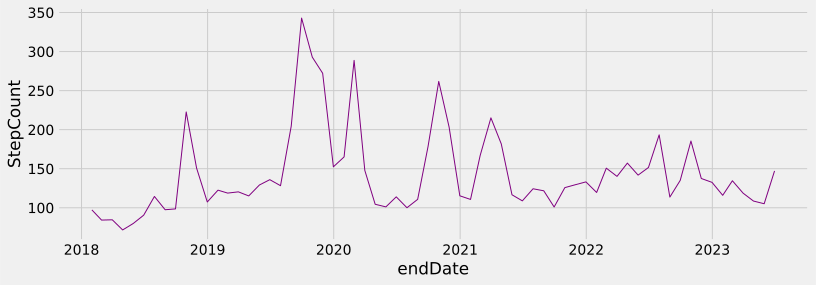

In [ ]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
import matplotlib.pyplot as plt

# Step Count from 2018 to 2023
fig = plt.figure(figsize=(12,4))
sns.lineplot(data=df['StepCount'], color='r', linewidth=1)